In [5]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/home/yahyaubuntu/Desktop/course2CatsAndDogs/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/home/yahyaubuntu/Desktop/course2CatsAndDogs')
zip_ref.close()

base_dir = '/home/yahyaubuntu/Desktop/course2CatsAndDogs/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=1e-4),
             metrics=['accuracy'])


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=1)

Epoch 1/30
100/100 [==============================] - 85s 841ms/step - loss: 0.6974 - accuracy: 0.4960 - val_loss: 0.6822 - val_accuracy: 0.5200
Epoch 2/30
100/100 [==============================] - 76s 755ms/step - loss: 0.6851 - accuracy: 0.5355 - val_loss: 0.6531 - val_accuracy: 0.6060
Epoch 3/30
100/100 [==============================] - 77s 769ms/step - loss: 0.6653 - accuracy: 0.5859 - val_loss: 0.6495 - val_accuracy: 0.5900
Epoch 4/30
100/100 [==============================] - 76s 755ms/step - loss: 0.6447 - accuracy: 0.6316 - val_loss: 0.6507 - val_accuracy: 0.5780
Epoch 5/30
100/100 [==============================] - 75s 747ms/step - loss: 0.6455 - accuracy: 0.6250 - val_loss: 0.5978 - val_accuracy: 0.6820
Epoch 6/30
100/100 [==============================] - 76s 755ms/step - loss: 0.6288 - accuracy: 0.6393 - val_loss: 0.5910 - val_accuracy: 0.6770
Epoch 7/30
100/100 [==============================] - 76s 759ms/step - loss: 0.6234 - accuracy: 0.6356 - val_loss: 0.5864 - val_ac

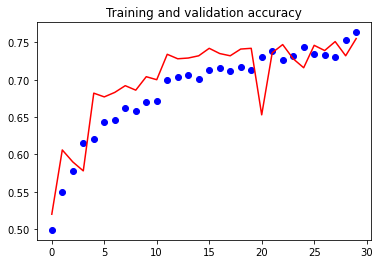

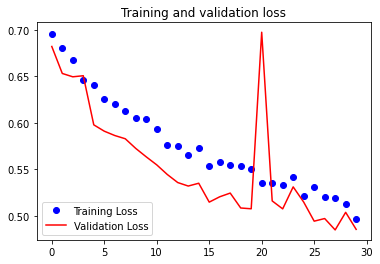

In [32]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
from tensorflow.keras.preprocessing import image
import numpy as np
path = '/home/yahyaubuntu/Desktop/course2CatsAndDogs/cats_and_dogs_filtered/train/dogs/dog.102.jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(  " is a cat")
else:
    print(  " is a dog") 

[1.]
 is a cat
